# Exploration and pre-processing

In [528]:
#import libraries
import pandas as pd
from tdc.multi_pred import DrugRes


In [529]:
#import data
data = DrugRes(name = 'GDSC2')
df = data.get_data()

Found local copy...
Loading...
Done!


In [530]:
df.head()

,Drug_ID,Drug,Cell Line_ID,Cell Line,Y
0,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1954,"[8.54820830373167, 2.5996072676336297, 10.3759...",-0.251083
1,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1143,"[7.58193774904993, 2.81430257671695, 10.363326...",1.343315
2,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1187,"[9.013252540641961, 2.9520929896608, 9.3474286...",1.736985
3,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1395,"[7.4351511634642105, 2.8325700611437004, 10.34...",-2.309078
4,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1599,"[8.334239608034789, 2.7477031637484997, 10.314...",-3.106684


In [531]:
print(f"Nº genes: {len(df['Cell Line'][0])}")

if all(len(df['Cell Line'][i]) == 17737 for i in range(len(df))):
    print("All cell lines have the same genes.")

Nº genes: 17737
All cell lines have the same genes.


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92703 entries, 0 to 92702
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Drug_ID       92703 non-null  object 
 1   Drug          92703 non-null  object 
 2   Cell Line_ID  92703 non-null  object 
 3   Cell Line     92703 non-null  object 
 4   Y             92703 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.5+ MB


In [533]:
# number of drugs
print(f"Number of drugs: {df['Drug_ID'].nunique()}")

Number of drugs: 137


In [534]:
# number of cell lines
print(f"Number of cell lines: {df['Cell Line_ID'].nunique()}")

Number of cell lines: 805


In [535]:
#check NaN values
print(df.isna().sum())

Drug_ID         0
Drug            0
Cell Line_ID    0
Cell Line       0
Y               0
dtype: int64


In [536]:
# check nan values in gene names
genes = data.get_gene_symbols()
count = 0
for x, i in enumerate(genes):
    if type(i) == float:
        genes[x] = str(i)



for i in genes:
    if i == 'nan':
        count += 1

print(f'\nNumber of nan gene names: {count}')

Found local copy...
Loading...



Number of nan gene names: 318


In [537]:
df.shape

(92703, 5)

In [538]:
# number of combinations of drugs and cell lines 
num_combinations = df[['Drug_ID', 'Cell Line_ID']].drop_duplicates().shape[0]
print(f'Number of combinations drug-cell line (without duplicates): {num_combinations}')
num_duplicates = df[['Drug_ID', 'Cell Line_ID']].duplicated(keep=False)
print(f'Number of duplicated combinations: {num_duplicates.sum()}')
num_duplicates_ic50 = df[['Drug_ID', 'Cell Line_ID', 'Y']].duplicated(keep=False)
print(f'Number of duplicated (and ic50) combinations: {num_duplicates_ic50.sum()}')

Number of combinations drug-cell line (without duplicates): 92029
Number of duplicated combinations: 1348
Number of duplicated (and ic50) combinations: 0


In [539]:
for i in range(len(df)):
    if num_duplicates[i]:
        print(f"Drug: {df['Drug_ID'][i]}, Cell Line: {df['Cell Line_ID'][i]}, IC50: {df['Y'][i]}")

Drug: Uprosertib, Cell Line: HCC1954, IC50: 2.29347
Drug: Uprosertib, Cell Line: HCC1143, IC50: 4.362441
Drug: Uprosertib, Cell Line: HCC1187, IC50: 5.203965
Drug: Uprosertib, Cell Line: HCC1395, IC50: 1.859264
Drug: Uprosertib, Cell Line: HCC1937, IC50: 2.544282
Drug: Uprosertib, Cell Line: HCC2157, IC50: 1.678903
Drug: Uprosertib, Cell Line: HCC38, IC50: 4.060488
Drug: Uprosertib, Cell Line: T47D, IC50: 2.851579
Drug: Uprosertib, Cell Line: MCF7, IC50: 1.674567
Drug: Uprosertib, Cell Line: BT-549, IC50: 2.999809
Drug: Uprosertib, Cell Line: Hs-578-T, IC50: 0.863779
Drug: Uprosertib, Cell Line: MDA-MB-231, IC50: 3.271618
Drug: Uprosertib, Cell Line: BT-20, IC50: 0.684388
Drug: Uprosertib, Cell Line: COLO-824, IC50: 1.78609
Drug: Uprosertib, Cell Line: CAL-120, IC50: 6.511333
Drug: Uprosertib, Cell Line: DU-4475, IC50: 2.374266
Drug: Uprosertib, Cell Line: EFM-19, IC50: 1.548945
Drug: Uprosertib, Cell Line: EVSA-T, IC50: -1.020308
Drug: Uprosertib, Cell Line: HCC1419, IC50: 2.103741
Dr

In [540]:
#remove duplicates
df = df.drop_duplicates(subset=['Drug_ID', 'Cell Line_ID'], keep='first')
df.shape

(92029, 5)

There are 1348 duplicated combinations (all of them with the Uprosertib drug), but with different ic50 values

In [541]:
# IC50 mean
mean_ic50 = df['Y'].mean()
print(f'Mean ic50 value (all combinations): {mean_ic50}')

Mean ic50 value (all combinations): 2.64346870185485


Gene expression are normalized by RMD (Relative mean difference)
### Relative Mean Difference 

When the probability distribution has a finite and nonzero arithmetic mean AM, the relative mean difference is defined by

RMD = MD /AM

The relative mean difference quantifies the mean absolute difference in comparison to the size of the mean and is a dimensionless quantity, is equal to twice the Gini coefficient which is defined in terms of the Lorenz curve. This relationship gives complementary perspectives to both the relative mean absolute difference and the Gini coefficient, including alternative ways of calculating their values.

### Drugs

In [542]:
from rdkit.Chem import PandasTools

In [543]:
drugs = df.groupby('Drug_ID').agg({'Drug': 'first', 'Drug_ID': 'count', 'Y': 'mean'}).rename(columns={'Drug_ID': 'Count', 'Y': 'Mean_Y'}).reset_index()
drugs = drugs.sort_values(by='Count', ascending=False)
drugs.head()

,Drug_ID,Drug,Count,Mean_Y
24,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,804,-2.228184
0,5-Fluorouracil,C1=C(C(=O)NC(=O)N1)F,802,4.703523
116,Taselisib,CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...,801,2.060803
17,Alpelisib,CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...,801,3.561909
14,Afatinib,CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=C...,801,1.739627


In [544]:
PandasTools.AddMoleculeColumnToFrame(drugs, 'Drug')

In [545]:
top_20_drugs = drugs.head(20)

In [546]:
top_20_drugs

,Drug_ID,Drug,Count,Mean_Y,ROMol
24,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,804,-2.228184,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc805f0>
0,5-Fluorouracil,C1=C(C(=O)NC(=O)N1)F,802,4.703523,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80660>
116,Taselisib,CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...,801,2.060803,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc806d0>
17,Alpelisib,CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...,801,3.561909,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc807b0>
14,Afatinib,CN(C)C/C=C/C(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=C...,801,1.739627,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80820>
92,PD0325901,C1=CC(=C(C=C1I)F)NC2=C(C=CC(=C2F)F)C(=O)NOC[C@...,801,0.356127,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80890>
111,Sapitinib,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...,800,3.746502,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80900>
109,SCH772984,C1CN(C[C@@H]1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC...,800,2.465635,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80970>
70,Linsitinib,CC1(CC(C1)C2=NC(=C3N2C=CN=C3N)C4=CC5=C(C=C4)C=...,800,3.729813,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc809e0>
65,LGK974,CC1=CC(=CN=C1C2=CC(=NC=C2)C)CC(=O)NC3=NC=C(C=C...,800,4.083284,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80a50>


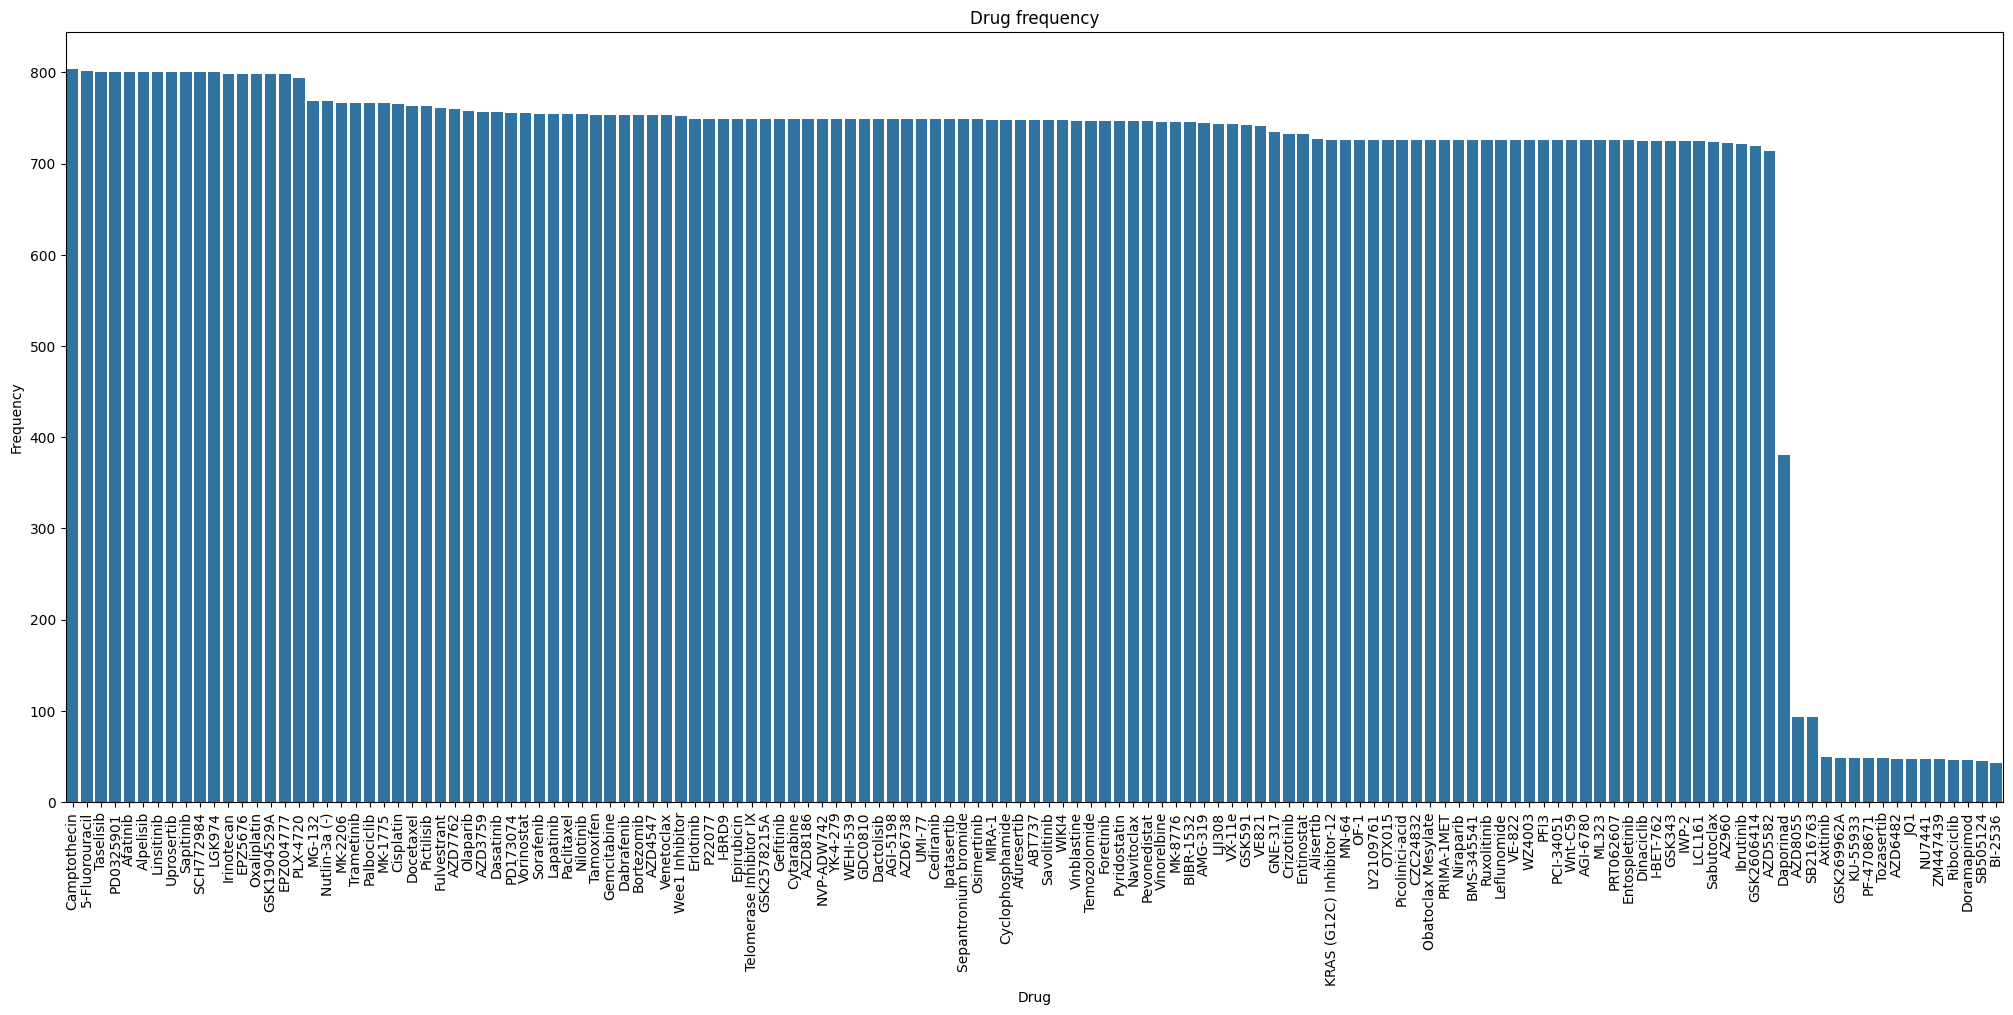

In [547]:
#plot sorted drug frequency
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
sns.countplot(x='Drug_ID', data=df, order=df['Drug_ID'].value_counts().index)
plt.title('Drug frequency')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

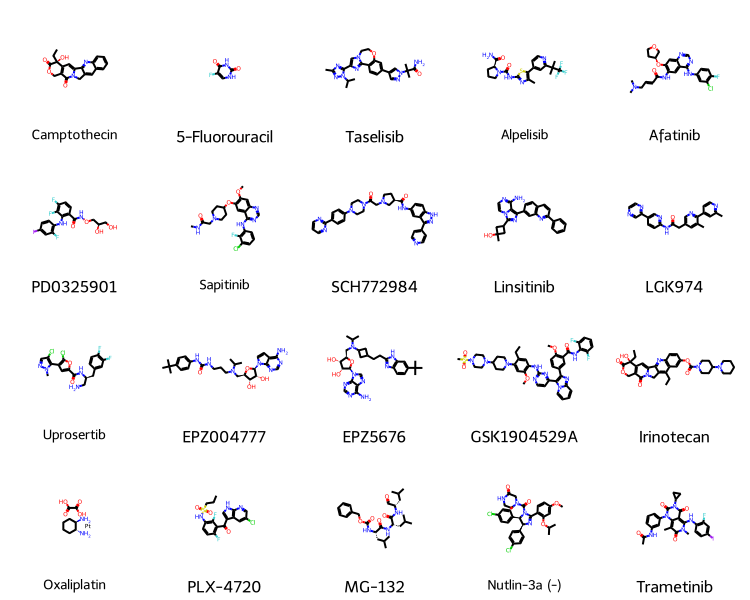

In [548]:
PandasTools.FrameToGridImage(top_20_drugs,column= 'ROMol', molsPerRow=5,subImgSize=(150,150),legendsCol='Drug_ID')

In [549]:
drugs = drugs.sort_values(by='Mean_Y', ascending=False)

In [550]:
drugs

,Drug_ID,Drug,Count,Mean_Y,ROMol
118,Temozolomide,CN1C(=O)N2C=NC(=C2N=N1)C(=O)N,747,5.923005,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc826c0>
38,EPZ5676,CC(C)N(C[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C...,798,5.569774,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc80ba0>
107,SB216763,CN1C=C(C2=CC=CC=C21)C3=C(C(=O)NC3=O)C4=C(C=C(C...,93,5.440685,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc83c30>
72,MIRA-1,CCC(=O)OCN1C(=O)C=CC1=O,748,5.340544,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc82340>
95,PFI3,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...,726,5.255539,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc836f0>
...,...,...,...,...,...
127,Vinblastine,CC[C@@]1(CC2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N...,747,-3.486369,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc827a0>
113,Sepantronium bromide,CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=...,749,-4.086884,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc82260>
32,Daporinad,C1CN(CCC1CCCCNC(=O)/C=C/C2=CN=CC=C2)C(=O)C3=CC...,380,-4.268115,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc83bc0>
35,Docetaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...,763,-4.390360,<rdkit.Chem.rdchem.Mol object at 0x7fd53fc810e0>


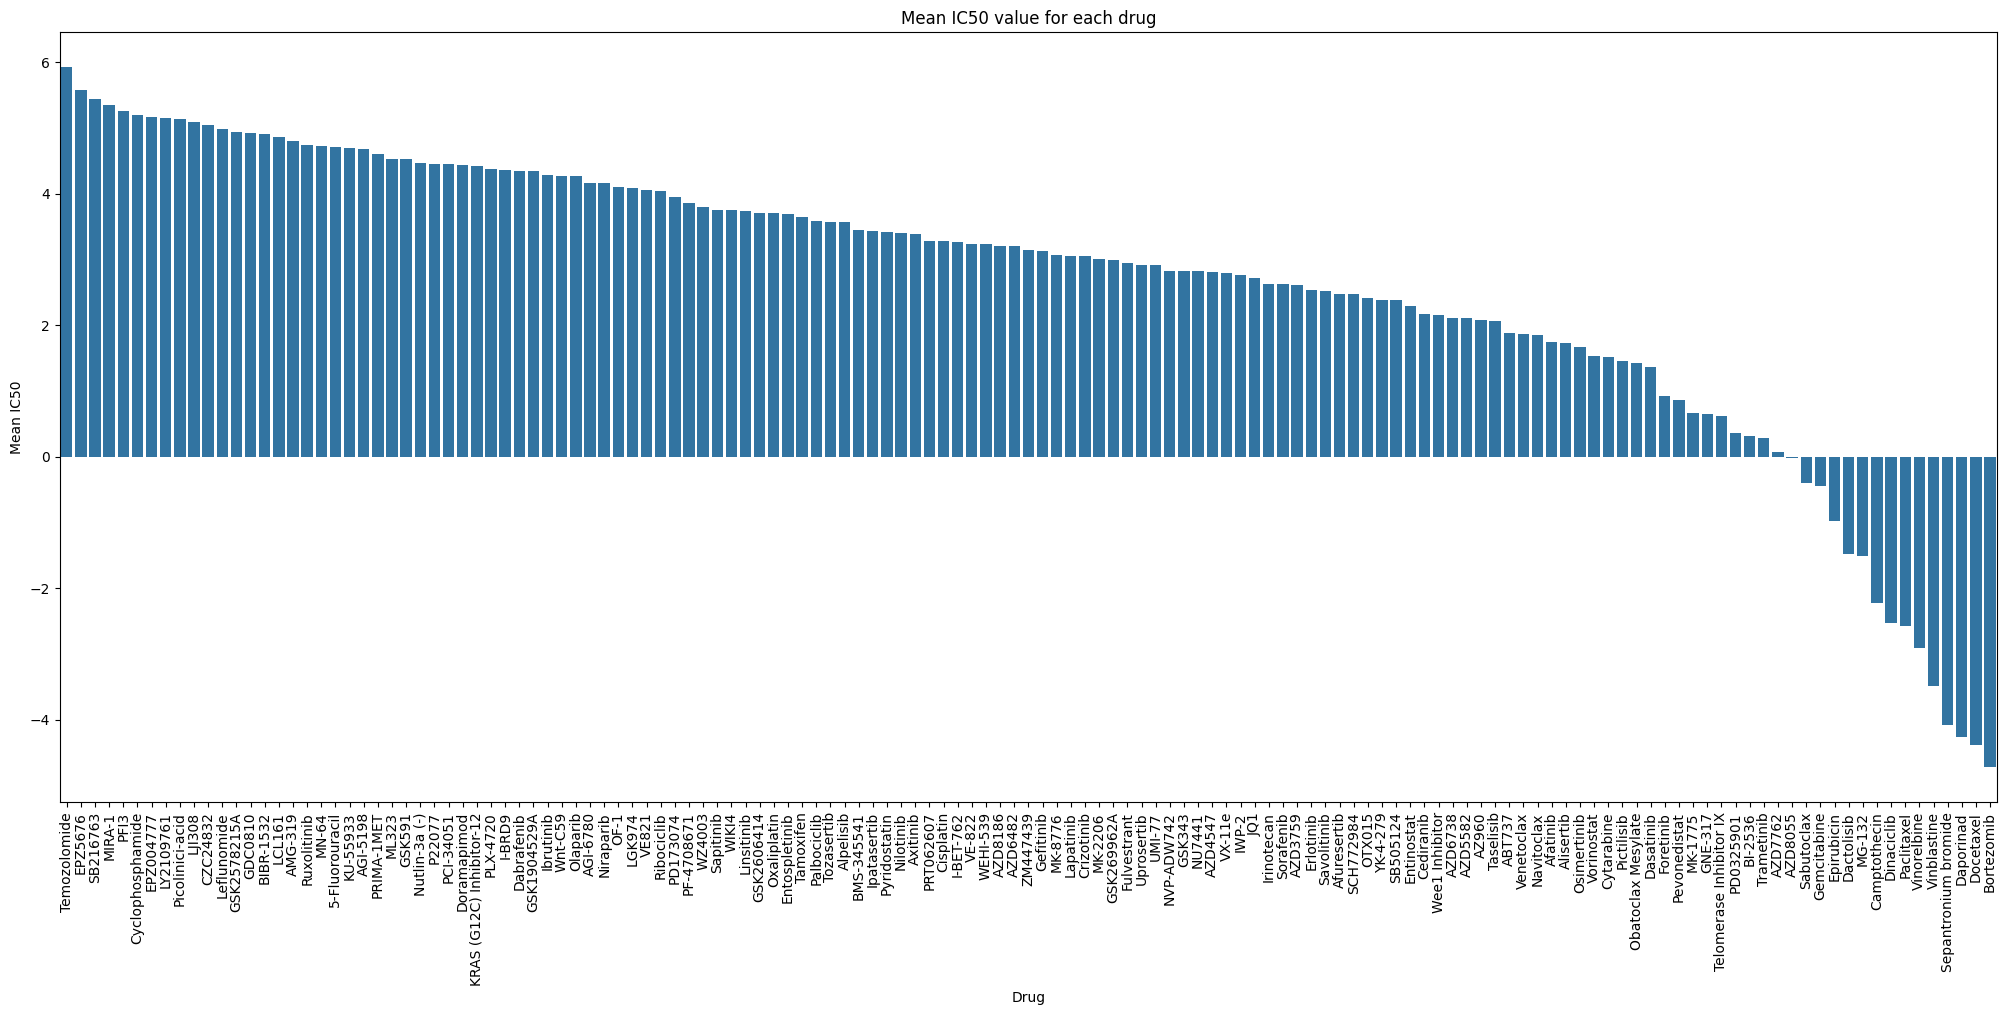

In [551]:
#plot mean_y from drugs (with seaborn)
plt.figure(figsize=(25,10))
sns.barplot(x='Drug_ID', y='Mean_Y', data=drugs)
plt.title('Mean IC50 value for each drug')
plt.xlabel('Drug')
plt.ylabel('Mean IC50')
plt.xticks(rotation=90)
plt.show()



## Cell lines

In [552]:
cell_line_info = pd.read_csv('./data/cell_line_info.csv')

In [553]:
cell_line_info.rename(columns={'Cell line Name': 'Cell Line_ID', ' Tissue':'Tissue'}, inplace=True)
cell_line_info

,Cell Line_ID,Model ID,COSMIC ID,TCGA Classfication,Tissue,Tissue sub-type,Datasets,number of drugs
0,22RV1,SIDM00499,924100,PRAD,urogenital_system,prostate,GDSC1,353
1,22RV1,SIDM00499,924100,PRAD,urogenital_system,prostate,GDSC2,282
2,23132-87,SIDM00980,910924,STAD,digestive_system,stomach,GDSC1,344
3,23132-87,SIDM00980,910924,STAD,digestive_system,stomach,GDSC2,281
4,42-MG-BA,SIDM00982,687561,GBM,nervous_system,glioma,GDSC1,345
...,...,...,...,...,...,...,...,...
1934,huH-1,SIDM00586,1298146,LIHC,digestive_system,liver,GDSC2,281
1935,no-10,SIDM00574,908452,LGG,nervous_system,glioma,GDSC1,393
1936,no-10,SIDM00574,908452,LGG,nervous_system,glioma,GDSC2,180
1937,no-11,SIDM00573,908450,LGG,nervous_system,glioma,GDSC1,390


In [554]:
cell_lines = df.groupby('Cell Line_ID').agg({'Cell Line': 'first', 'Cell Line_ID': 'count', 'Y': 'mean'}).rename(columns={'Cell Line_ID': 'Count', 'Y': 'Mean_Y'}).reset_index()
cell_lines = cell_lines.sort_values(by='Count', ascending=False)

In [555]:
# Check if all values in 'Cell line Name' column are in 'Cell Line_ID' column
all_present = cell_lines['Cell Line_ID'].isin(cell_line_info['Cell Line_ID'])
count = 0
for i in range(len(cell_lines)):
    if not all_present[i]:
        count += 1
        print(f'Cell line {cell_lines["Cell Line_ID"][i]} not present in cell_line_info')

print(f'\nNumber of cell lines not present in cell_line_info: {count}')

Cell line CL-34 not present in cell_line_info
Cell line CL-40 not present in cell_line_info
Cell line EGI-1 not present in cell_line_info
Cell line GMS-10 not present in cell_line_info
Cell line HD-MY-Z not present in cell_line_info
Cell line MC-CAR not present in cell_line_info
Cell line NCI-H1417 not present in cell_line_info
Cell line PL18 not present in cell_line_info
Cell line SNU-182 not present in cell_line_info
Cell line SW900 not present in cell_line_info
Cell line VM-CUB-1 not present in cell_line_info

Number of cell lines not present in cell_line_info: 11


In [556]:
cell_lines = cell_lines.merge(cell_line_info, on='Cell Line_ID', how='left')

In [557]:
cell_lines = cell_lines[['Cell Line_ID', 'Cell Line', 'Tissue', 'Tissue sub-type', 'Count', 'Mean_Y', ' Datasets']]
cell_lines = cell_lines[cell_lines[' Datasets'] != 'GDSC1']
cell_lines

,Cell Line_ID,Cell Line,Tissue,Tissue sub-type,Count,Mean_Y,Datasets
1,MDA-MB-157,"[5.500208905976, 3.10477591586454, 10.91037141...",breast,breast,136,3.126755,GDSC2
3,CAMA-1,"[6.90040710684829, 2.72616293009199, 9.5782068...",breast,breast,136,2.595224,GDSC2
5,MDA-MB-231,"[7.78398331989301, 2.8451233857777596, 10.0478...",breast,breast,136,2.527992,GDSC2
7,MDA-MB-415,"[6.391808704591889, 2.84384586598087, 10.27915...",breast,breast,136,2.463053,GDSC2
9,HCC38,"[7.45295424757166, 2.8849173944300897, 10.1733...",breast,breast,136,3.554996,GDSC2
...,...,...,...,...,...,...,...
1590,KYSE-510,"[7.749944586336941, 2.6268656705538596, 10.291...",aero_digestive_tract,oesophagus,28,2.318249,GDSC2
1592,ECC12,"[6.3020164507089005, 2.96231026474136, 10.0249...",digestive_system,stomach,26,3.393325,GDSC2
1594,COR-L95,"[5.3629342552905594, 2.55592992686908, 9.63412...",lung,lung_small_cell_carcinoma,20,1.215786,GDSC2
1596,LNZTA3WT4,"[4.86934974195138, 2.64680880188622, 10.132068...",nervous_system,glioma,19,1.295439,GDSC2


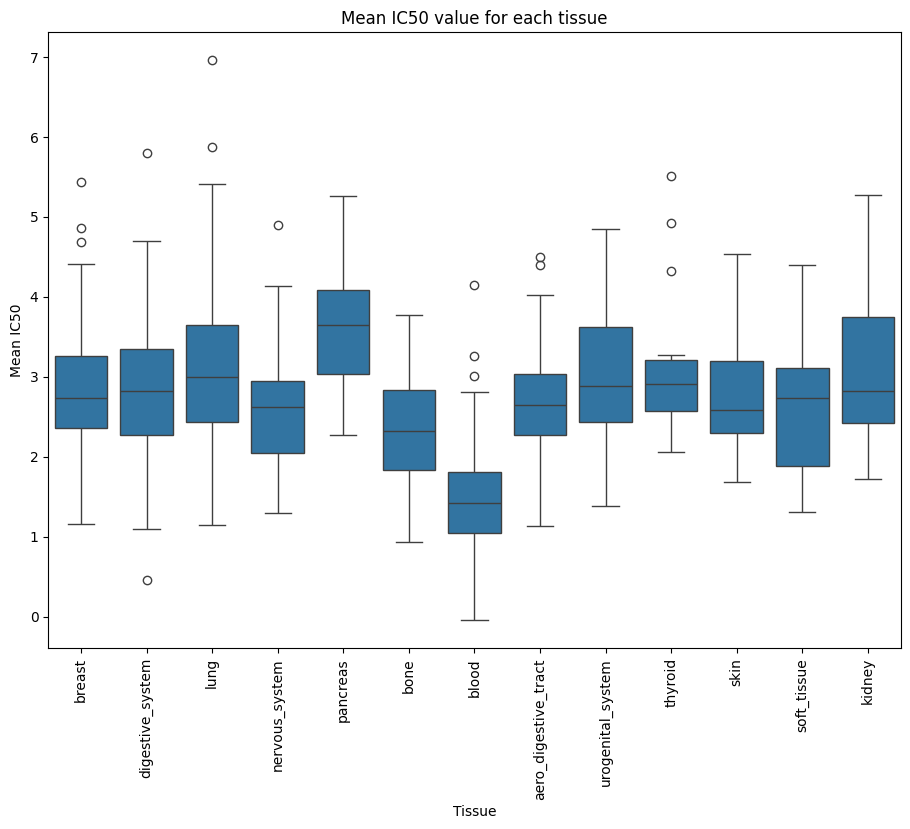

In [558]:
#boxplot with mean value of mean_y for each tissue
plt.figure(figsize=(11,8))
sns.boxplot(x='Tissue', y='Mean_Y', data=cell_lines)

plt.title('Mean IC50 value for each tissue')
plt.xlabel('Tissue')
plt.ylabel('Mean IC50')
plt.xticks(rotation=90)
plt.show()


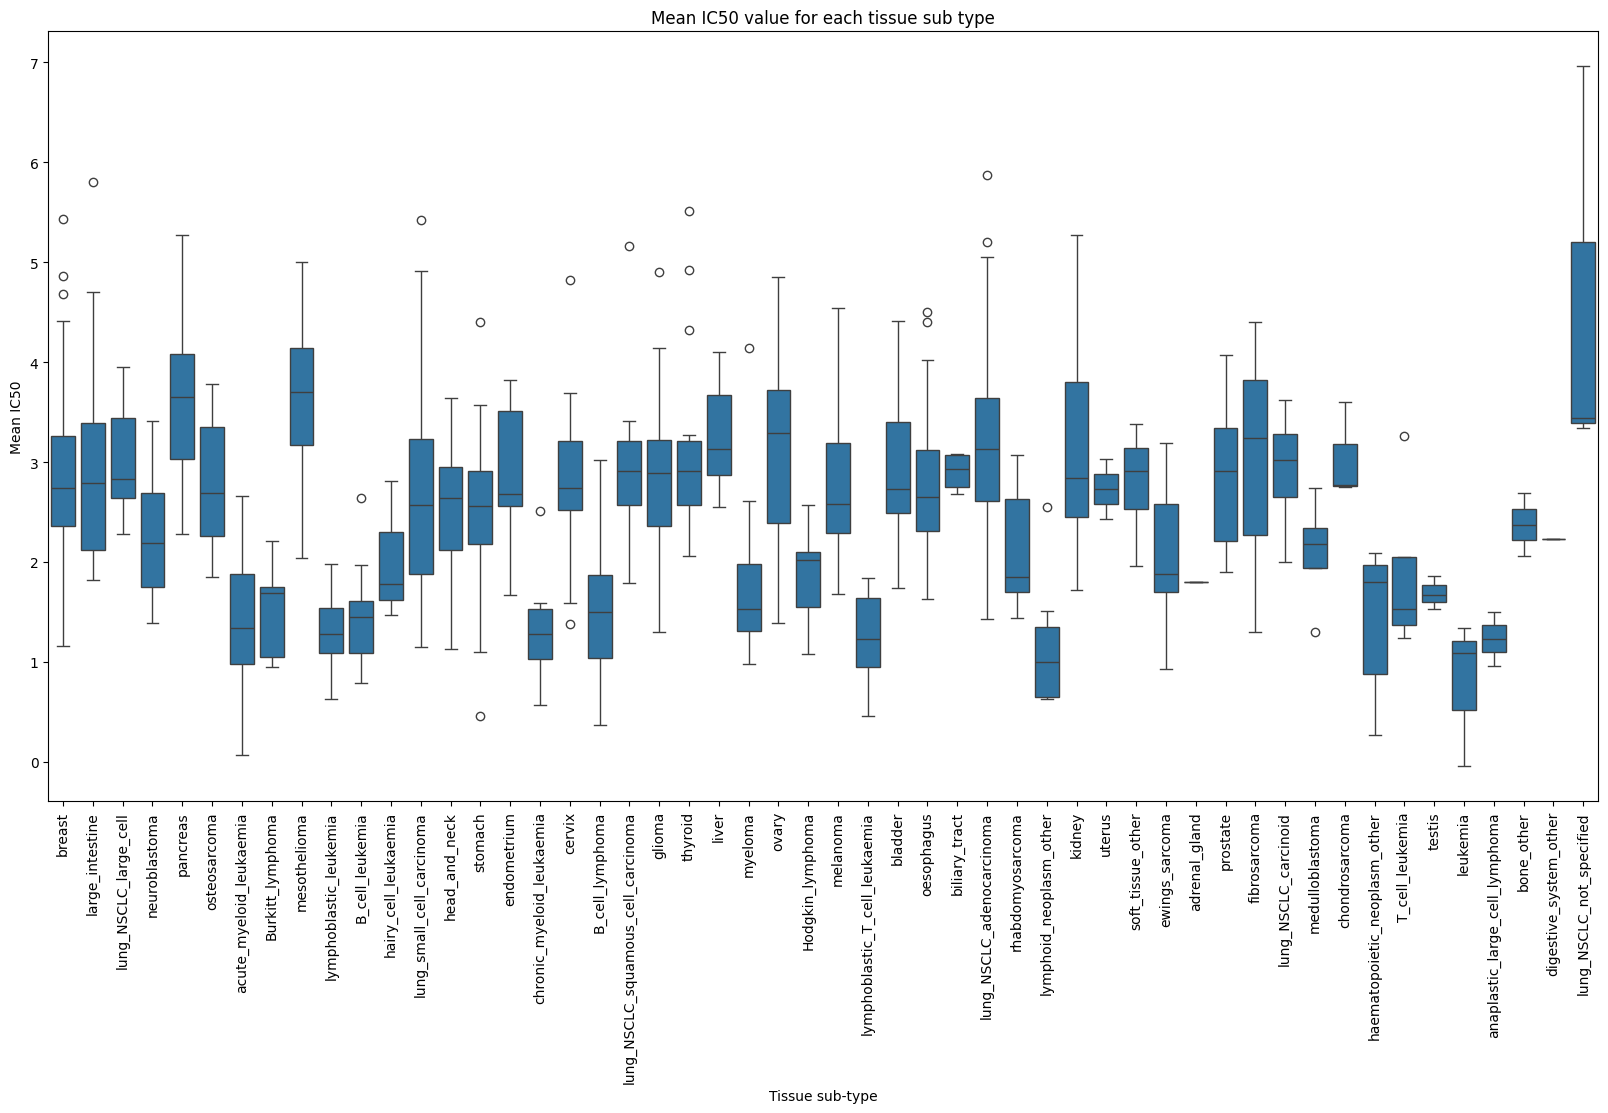

In [563]:
#boxplot with mean value of mean_y for each tissue
plt.figure(figsize=(20,10))
sns.boxplot(x='Tissue sub-type', y='Mean_Y', data=cell_lines)

plt.title('Mean IC50 value for each tissue sub type')
plt.xlabel('Tissue sub-type')
plt.ylabel('Mean IC50')
plt.xticks(rotation=90)
plt.show()


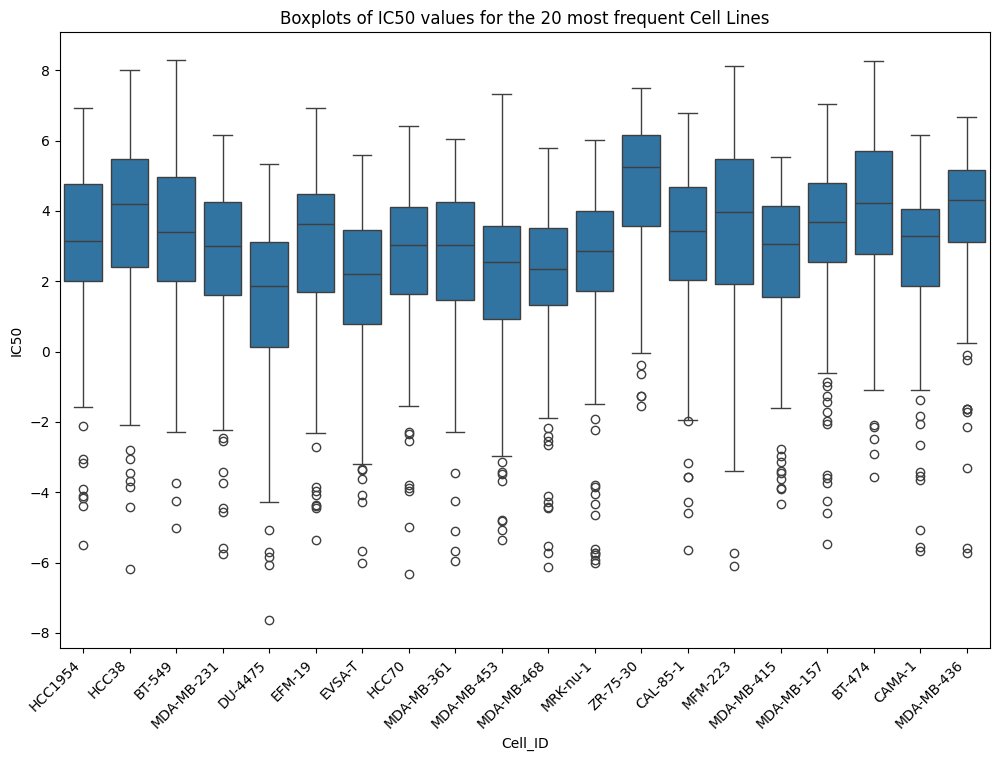

In [515]:
# Get the 20 most frequent Cell Line_ID values
top_20_cell = df['Cell Line_ID'].value_counts().nlargest(20).index

# Filter the DataFrame for the top 20 Cell Line_ID values
df_top_20 = df[df['Cell Line_ID'].isin(top_20_cell)]

# Create boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cell Line_ID', y='Y', data=df_top_20)
plt.title('Boxplots of IC50 values for the 20 most frequent Cell Lines')
plt.xlabel('Cell_ID')
plt.ylabel('IC50')
plt.xticks(rotation=45, ha='right')  
plt.show()

### Create clean datasets

gene expression (cell lines)

In [524]:
gene_expression_dict = {} 

for index, row in df.iterrows():
    gene_expression_dict[row['Cell Line_ID']] = dict(zip(genes, row['Cell Line']))

In [525]:
gene_expression_by_drug_dict = {}

for index, row in df.iterrows():
    gene_expression_by_drug_dict[row['Drug_ID']] = dict(zip(genes, row['Cell Line']))

In [526]:
gene_expression = pd.DataFrame.from_dict(gene_expression_dict, orient='index')

In [564]:
gene_expression

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,PPY2,KRT18P55,POLRMTP1,UBL5P2,TBC1D3P5
HCC1954,8.548208,2.599607,10.375991,5.178378,4.267357,3.092322,6.170279,7.553067,9.280913,5.474400,...,3.413112,3.228033,4.666941,2.632448,3.511284,3.013987,3.333420,2.867266,8.781375,3.232597
HCC1143,7.581938,2.814303,10.363326,3.770037,3.394502,3.111186,6.228677,8.440833,8.005206,5.669074,...,3.591381,3.238828,4.059109,2.564325,4.324982,3.209396,3.539049,2.984753,9.361984,3.225168
HCC1187,9.013253,2.952093,9.347429,4.982836,4.122282,3.290773,3.014210,5.551352,5.032812,7.126702,...,7.497050,3.350337,4.604941,2.914548,4.450711,3.301961,3.088815,2.985197,9.628198,3.425641
HCC1395,7.435151,2.832570,10.344827,3.877500,3.555658,3.511154,7.652886,8.245466,5.650228,6.008727,...,3.420246,3.334150,3.933930,2.641512,4.761300,3.326525,2.891492,2.984267,8.766315,3.487581
HCC1599,8.334240,2.747703,10.314551,4.691847,3.906000,3.199376,3.489741,7.464137,6.321866,5.216688,...,3.732887,3.201282,4.057951,2.749716,4.713647,3.118046,3.105409,3.261109,9.617997,3.346011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCC010,5.987799,2.784995,10.052390,3.668912,3.767270,3.085118,5.332890,8.031837,6.249088,4.950251,...,3.369585,3.532607,4.051723,2.621257,4.634649,3.498556,3.384732,2.977642,9.363887,3.320187
RCC-JW,7.529016,3.195540,10.600703,3.997457,4.544972,3.450394,5.279941,7.988237,4.217507,5.345541,...,3.075105,3.789976,4.708105,2.609469,3.816648,3.152940,3.364600,3.126751,10.156729,3.376311
MM1S,3.210050,2.874365,10.700068,5.069513,4.781263,3.170943,3.145185,6.453126,5.564713,5.589164,...,3.256844,3.427507,3.786833,2.669626,4.439463,3.055257,3.285702,3.419171,10.088247,3.507856
SNU-61,8.077116,2.781325,10.038055,5.205411,3.758069,3.111444,3.714148,8.947314,6.013510,4.406719,...,4.991264,3.312884,4.008429,2.772584,5.787669,3.283547,3.740781,3.471996,8.837456,3.143362


In [565]:
for i, x in enumerate(gene_expression.columns):
    if x == 'nan':
        print(i, x)

#there is one nan value left
        
gene_expression = gene_expression.drop(gene_expression.columns[82], axis=1)

82 nan


In [566]:
gene_expression.to_csv('./data/gene_expression.csv')

drugs dataset

In [567]:
drugs = df.drop_duplicates(subset=['Drug_ID', 'Drug']).drop(['Cell Line', 'Cell Line_ID', 'Y'], axis=1)
drugs

,Drug_ID,Drug
0,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...
804,Vinblastine,CC[C@@]1(CC2C[C@@](C3=C(CCN(C2)C1)C4=CC=CC=C4N...
1551,Cisplatin,N.N.[Cl-].[Cl-].[Pt+2]
2316,Cytarabine,C1=CN(C(=O)N=C1N)[C@H]2[C@H]([C@@H]([C@H](O2)C...
3065,Docetaxel,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
...,...,...
90383,LJI308,C1COCCN1C2=CC=C(C=C2)C3=C(C=NC=C3)C4=CC(=C(C(=...
91126,GSK591,C1CC(C1)NC2=NC=CC(=C2)C(=O)NC[C@@H](CN3CCC4=CC...
91868,VE821,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...
92609,AZD6482,CC1=CN2C(=O)C=C(N=C2C(=C1)[C@@H](C)NC3=CC=CC=C...


In [568]:
drugs.to_csv('./data/drugs.csv')

drug - cell line combinations dataset

In [570]:
combinations = df.drop(['Drug', 'Cell Line'], axis=1)
combinations

,Drug_ID,Cell Line_ID,Y
0,Camptothecin,HCC1954,-0.251083
1,Camptothecin,HCC1143,1.343315
2,Camptothecin,HCC1187,1.736985
3,Camptothecin,HCC1395,-2.309078
4,Camptothecin,HCC1599,-3.106684
...,...,...,...
92698,JQ1,EFM-192A,3.576583
92699,JQ1,HCC1428,1.402466
92700,JQ1,HDQ-P1,2.762460
92701,JQ1,JIMT-1,3.442930


In [571]:
combinations.to_csv('./data/combinations.csv')